In [1]:
# 從 scikit-learn 1.2 起，load_boston 被正式移除。以下舊程式無法抓取原始資料
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston["data"],
#                   columns = boston["feature_names"])
# df["ans"] = boston["target"]
# df

# 可使用下列方法取得原始資料
# from sklearn.datasets import fetch_openml
# boston = fetch_openml(name="boston", version=1, as_frame=True)
# X = boston.data
# y = boston.target


In [2]:
import pandas as pd
boston = {}
boston["data"] = pd.read_csv('./Data/data.csv')
boston["target"] = pd.read_csv('./Data/target.csv')

In [3]:
# 切割資料
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size = 0.1)

In [4]:
# 使用演算法：決策樹(迴歸) - mse最小化
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(
    max_depth=5,     #依照經驗，若欄位較少-->2, 3:若欄位較多-->5
    random_state=2
)
reg.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",2
,"max_leaf_

In [5]:
# 回歸問題-->預測值不能使用
#from sklearn.metrics import accuracy_score
#pre = clf.predict(x_test)
#print("預測", list(pre))
#print("正確", list(y_test))
#print("正確率", accuracy_score(pre, y_test))

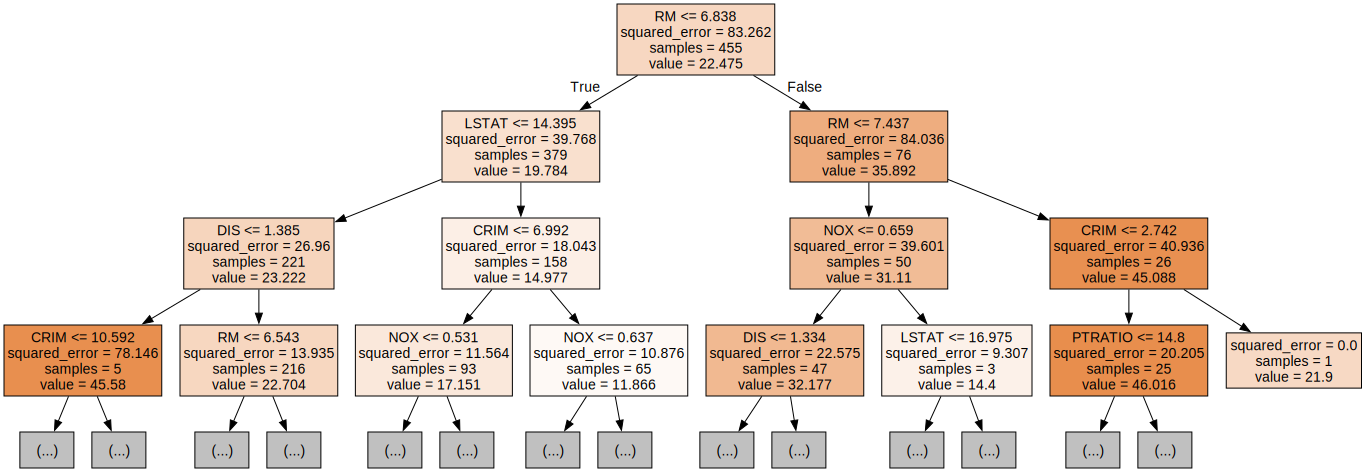

In [6]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
                    feature_names = boston["data"].columns,
                    filled = True,
                    max_depth = 3)  #控制[畫圖]的決策樹大小(不影響實際決策樹)
                    # 之前會有 [class_names = boston["target_names"],] 但房價為連續資料-->不使用
graphviz.Source(g)

In [7]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("r2_score:", r2_score(y_test, pre))

r2_score: 0.8370304056984228
